In [120]:
#Hate speech detection 


import pandas as pd #library for input of dataset input and data cleaning 
import numpy as np  #To store data in multidimensional array


In [121]:
dataset = pd.read_csv("/kaggle/input/twitter/twitter.csv") #input of dataset that is being analyzed 

In [122]:
dataset.isnull().sum() #For inormation about empty blocks in a column
dataset.info() #For information about structure of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [123]:
dataset.describe() #If we want  to do some stastical analysis on our dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [124]:
# Define the mapping dictionary
label_mapping = {
    0: "hatespeech",
    1: "offensive language",
    2: "neither hate nor offensive"
}
dataset["labels"]=dataset["class"].map(label_mapping) 

In [125]:
data = dataset[["tweet", "labels"]]

In [126]:
import re #regular expression, generally used in searching for patterns, replacing text and splitting strings
import nltk  #for stemming
import string

In [127]:
from nltk.corpus import stopwords #to remove frequently occuring words in a sentence
stopwords = set(stopwords.words("english"))

In [128]:
#import stemming
stemmer = nltk.SnowballStemmer("english") #converts words to their baseroot like dancing to dance

In [129]:
#data cleaning
def clean_data(text):
    text = str(text).lower()                                   #convert string to lowercase
    text = re.sub('http?://\s+\www\.s+','',text)               #Remove any text within []
    text = re.sub('\[.*?\]','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text = re.sub('\n','',text)
    text = re.sub('\w*\d\w*','',text)                         #Remove any digit from text 
    #stop words removal
    text = [word for word in text.split(' ') if word not in stopwords]
    text = " ".join(text)
    #stemming the text 
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = ' '.join(text)
    return text
    
    

In [130]:
data["tweet"] = data["tweet"].apply(clean_data) #clean the data accoring to our function

/tmp/ipykernel_36/1318434286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data) #clean the data accoring to our function


In [131]:
x = np.array(data["tweet"])
y = np.array(data["labels"])

In [132]:
from sklearn.feature_extraction.text import CountVectorizer #convert text to a count matrix
from sklearn.model_selection import train_test_split        #Split dataset to train and test 

In [133]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.33, random_state =42 )
#dataset  trained and test with specific proportions and reproducibility

In [135]:
#Building our ML model
from sklearn.tree import DecisionTreeClassifier #is a classifier for classification task
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_prep = dt.predict(x_test)

In [136]:
#confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_prep)

In [137]:
import seaborn as sns
import matplotlib.pyplot as ply


<Axes: >

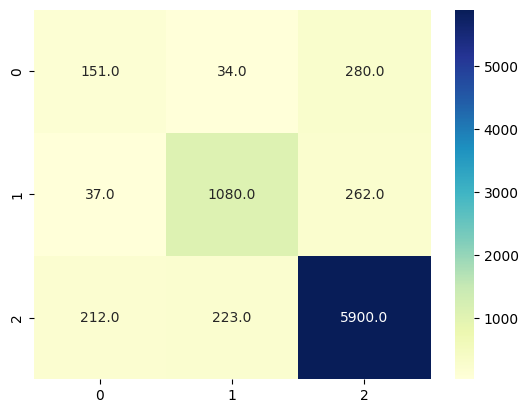

In [138]:
sns.heatmap(cm,annot= True, fmt = ".1f", cmap = "YlGnBu" ) #This is confusion matrix for performance of classification model

In [139]:
from sklearn.metrics import accuracy_score #for accuracy of model
accuracy_score(y_test, y_pred)

0.87284509108693

In [141]:
#Illustration
sample = "You are a good boy but i will kill you"
sample = clean_data(sample)
data1 = cv.transform([sample]).toarray()
data1
dt.predict(data1)

array(['hatespeech'], dtype=object)